# Plot a Diagram explaining a Convolution

## Fig 10.2

In [1]:
"""
Plot a Diagram explaining a Convolution
---------------------------------------
Figure 10.2

A schematic of how the convolution of two functions works. The top-left panel
shows simulated data (black line); this time series is convolved with a top-hat
function (gray boxes); see eq. 10.8. The top-right panels show the Fourier
transform of the data and the window function. These can be multiplied together
(bottom-right panel) and inverse transformed to find the convolution
(bottom-left panel), which amounts to integrating the data over copies of the
window at all locations. The result in the bottom-left panel can be viewed as
the signal shown in the top-left panel smoothed with the window (top-hat)
function.
"""


'\nPlot a Diagram explaining a Convolution\n---------------------------------------\nFigure 10.2\n\nA schematic of how the convolution of two functions works. The top-left panel\nshows simulated data (black line); this time series is convolved with a top-hat\nfunction (gray boxes); see eq. 10.8. The top-right panels show the Fourier\ntransform of the data and the window function. These can be multiplied together\n(bottom-right panel) and inverse transformed to find the convolution\n(bottom-left panel), which amounts to integrating the data over copies of the\nwindow at all locations. The result in the bottom-left panel can be viewed as\nthe signal shown in the top-left panel smoothed with the window (top-hat)\nfunction.\n'

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from scipy.signal import fftconvolve

In [3]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec

In [4]:
N=10
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


In [6]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=18, usetex=True)

# Generate random x, y with a given covariance length

In [7]:
#------------------------------------------------------------
# Generate random x, y with a given covariance length
np.random.seed(1)
x = np.linspace(0, 1, 500)
h = 0.01
C = np.exp(-0.5 * (x - x[:, None]) ** 2 / h ** 2)
y = 0.8 + 0.3 * np.random.multivariate_normal(np.zeros(len(x)), C)

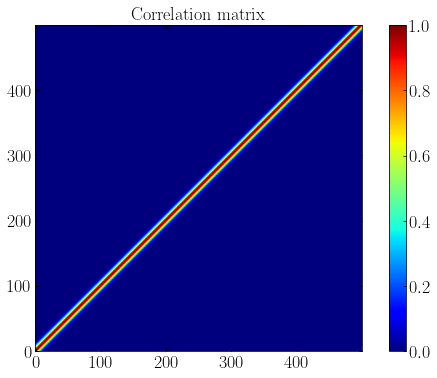

In [8]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
im=ax.imshow(C,origin="lower",cmap="jet")
ax.set_title("Correlation matrix")
plt.colorbar(im,ax=ax)

In [9]:
y.shape

(500,)

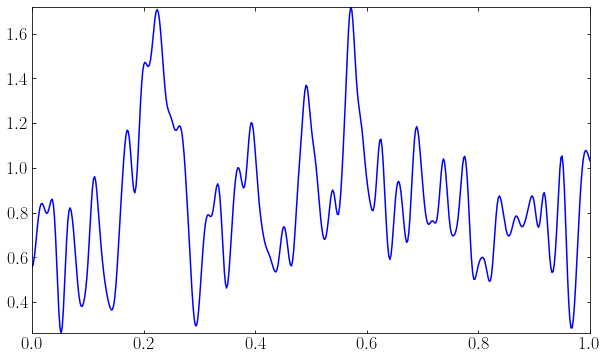

In [10]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(x,y,"b-")

# Define a normalized top-hat window function

In [11]:
#------------------------------------------------------------
# Define a normalized top-hat window function
w = np.zeros_like(x)
w[(x > 0.12) & (x < 0.28)] = 1

#------------------------------------------------------------

# Perform the convolution

In [12]:
#------------------------------------------------------------
# Perform the convolution
y_norm = np.convolve(np.ones_like(y), w, mode='full')
valid_indices = (y_norm != 0)

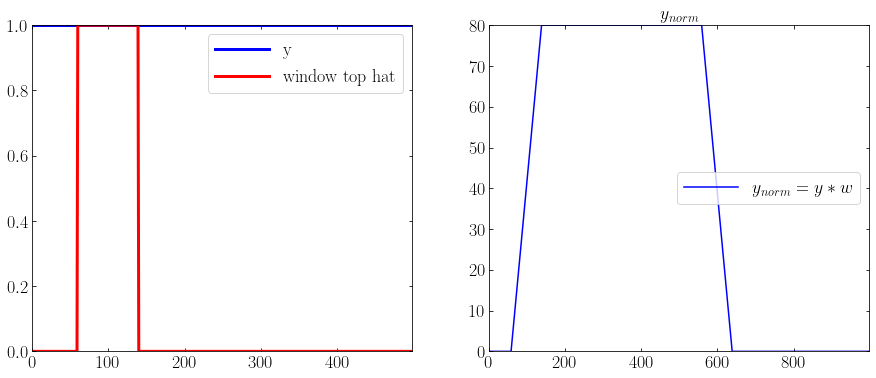

In [13]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(121)
ax.plot(np.ones_like(y),"b-",lw=3,label="y")
ax.plot(w,"r-",lw=3,label="window top hat")
ax.legend()

ax = fig.add_subplot(122)
ax.plot(y_norm,"b-",label="$y_{norm} = y*w$")
ax.set_title("$y_{norm}$")

ax.legend()

In [14]:
y_norm = y_norm[valid_indices]

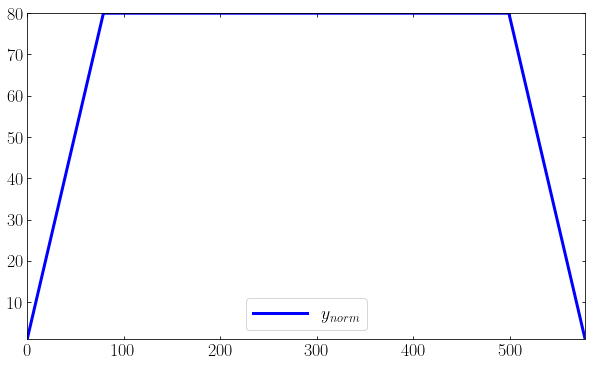

In [15]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(y_norm,"b-",lw=3,label="$y_{norm}$")
ax.legend()

In [16]:
y_norm.shape

(579,)

In [17]:
y_w = np.convolve(y, w, mode='full')[valid_indices] / y_norm

# -------------------------------------------------------------------------------------
# trick: convolve with x-coordinate to find the center of the window at each point.
# -------------------------------------------------------------------------------------
x_w = np.convolve(x, w, mode='full')[valid_indices] / y_norm

In [18]:
print(r"$\delta$")

$\delta$


Text(0.5, 1.0, 'Y convolved with top hat window')

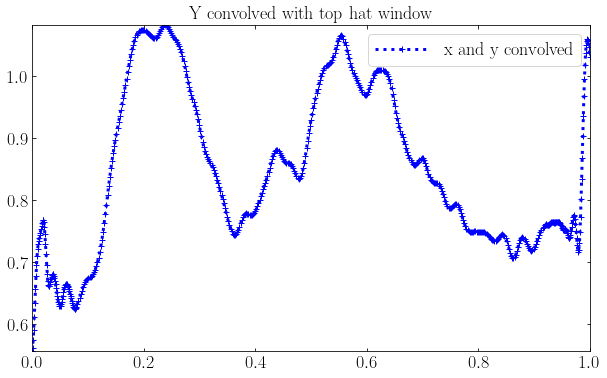

In [19]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(x_w,y_w,"b:+",lw=3,label="x and y convolved")
ax.legend()
ax.set_title("Y convolved with top hat window")


In [20]:
y_w.shape

(579,)

# Compute the Fourier transforms of the signal and window

In [21]:
#------------------------------------------------------------
# Compute the Fourier transforms of the signal and window
y_fft = np.fft.fft(y)
w_fft = np.fft.fft(w)

yw_fft = y_fft * w_fft
yw_final = np.fft.ifft(yw_fft)


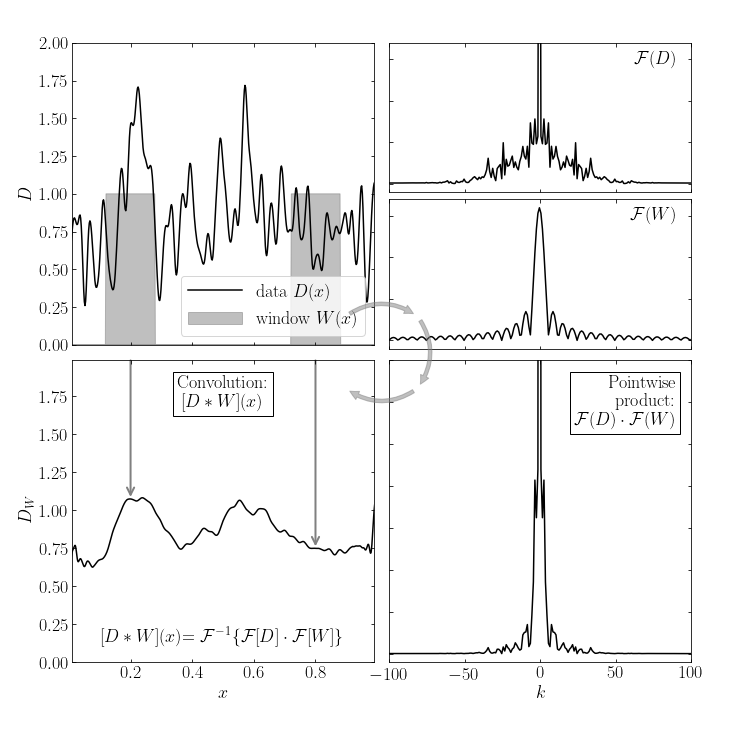

In [22]:
#------------------------------------------------------------
# Set up the plots
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0.09, bottom=0.09, right=0.95, top=0.95,
                    hspace=0.05, wspace=0.05)


#----------------------------------------
# plot the data and window function
#----------------------------------------

ax = fig.add_subplot(221)
ax.plot(x, y, '-k', label=r'data $D(x)$')
ax.fill(x, w, color='gray', alpha=0.5,
        label=r'window $W(x)$')
ax.fill(x, w[::-1], color='gray', alpha=0.5)

ax.legend()
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('$D$')

ax.set_xlim(0.01, 0.99)
ax.set_ylim(0, 2.0)




#----------------------------------------
# plot the convolution
#------------------------------------------
ax = fig.add_subplot(223)
ax.plot(x_w, y_w, '-k')

ax.text(0.5, 0.95, "Convolution:\n" + r"$[D \ast W](x)$",
        ha='center', va='top', transform=ax.transAxes,
        bbox=dict(fc='w', ec='k'), zorder=2)

ax.text(0.5, 0.05,
        (r'$[D \ast W](x)$' +
         r'$= \mathcal{F}^{-1}\{\mathcal{F}[D] \cdot \mathcal{F}[W]\}$'),
        ha='center', va='bottom', transform=ax.transAxes)

for x_loc in (0.2, 0.8):
    y_loc = y_w[x_w <= x_loc][-1]
    ax.annotate('', (x_loc, y_loc), (x_loc, 2.0), zorder=1,
                arrowprops=dict(arrowstyle='->', color='gray', lw=2))

ax.set_xlabel('$x$')
ax.set_ylabel('$D_W$')

ax.set_xlim(0.01, 0.99)
ax.set_ylim(0, 1.99)




#----------------------------------------
# plot the Fourier transforms
#-----------------------------------------
N = len(x)
k = - 0.5 * N + np.arange(N) * 1. / N / (x[1] - x[0])

ax = fig.add_subplot(422)
ax.plot(k, abs(np.fft.fftshift(y_fft)), '-k')

ax.text(0.95, 0.95, r'$\mathcal{F}(D)$',
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(-100, 100)
ax.set_ylim(-5, 85)

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

ax = fig.add_subplot(424)
ax.plot(k, abs(np.fft.fftshift(w_fft)), '-k')

ax.text(0.95, 0.95,  r'$\mathcal{F}(W)$', ha='right', va='top',
        transform=ax.transAxes)

ax.set_xlim(-100, 100)
ax.set_ylim(-5, 85)

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())



#----------------------------------------
# plot the product of Fourier transforms
#------------------------------------------
ax = fig.add_subplot(224)
ax.plot(k, abs(np.fft.fftshift(yw_fft)), '-k')

ax.text(0.95, 0.95, ('Pointwise\nproduct:\n' +
                     r'$\mathcal{F}(D) \cdot \mathcal{F}(W)$'),
        ha='right', va='top', transform=ax.transAxes,
        bbox=dict(fc='w', ec='k'), zorder=2)

ax.set_xlim(-100, 100)
ax.set_ylim(-100, 3500)

ax.set_xlabel('$k$')

ax.yaxis.set_major_formatter(plt.NullFormatter())


#------------------------------------------------------------
# Plot flow arrows
#-------------------------------------
ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)

arrowprops = dict(arrowstyle="simple",
                  color="gray", alpha=0.5,
                  shrinkA=5, shrinkB=5,
                  patchA=None,
                  patchB=None,
                  connectionstyle="arc3,rad=-0.35")

ax.annotate('', [0.57, 0.57], [0.47, 0.57],
            arrowprops=arrowprops,
            transform=ax.transAxes)
ax.annotate('', [0.57, 0.47], [0.57, 0.57],
            arrowprops=arrowprops,
            transform=ax.transAxes)
ax.annotate('', [0.47, 0.47], [0.57, 0.47],
            arrowprops=arrowprops,
            transform=ax.transAxes)

plt.show()
